<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/MLC/blob/main/DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align:center;line-height:300%;">
<font face="Tahoma" size=7>
<h4>Data Science Project</h4>
  </font>
</div>


<div style="text-align:center;direction:ltr;line-height:300%;">
<font face="Tahoma" size=3>
<h1> AIVengers, summer 2023  </h1>
  </font>
</div>
<div style="text-align:center;direction:ltr;line-height:300%;">
<font face="Tahoma" size=3>
<h1> Olympics Athletes  </h1>
  </font>
</div>

# Introduction

### Enter your information & RUN the cell!

In [1]:
name = "alireza khaleghi"
telegram_id =  "@mehrdadesheshom"

print("your name:", name)
print("your telegram id:", telegram_id)

your name: alireza khaleghi
your telegram id: @mehrdadesheshom


### **In this project we are going to explore the stats of Olympic games' athletes. A dataset is provided which includes the atheletes names along with their weights, heights, ages and nationalities. Their corresponding athletic field with their medal has been provided as well.**

# Importing the necessary packages

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

!pip install bar-chart-race

import bar_chart_race as bcr
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
#======================================================
#Add all necessary packages here
#======================================================

# Loading the given dataset

In [3]:
df = pd.read_csv('./dataset_olympics.csv', index_col=0)

df

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN


# Data preprocessing

### As you may have already guessed, some fields in the dataframe are not valid! For example the age of some atheletes is NaN! In the medals column, those atheletes without a medal are described with NaN as well!

In [4]:
df['Age'].isnull().sum()

2732

### Since the age is important in our analysis, we need to remove all records with NaN age. Also, the athletes without a medal must also have a new category named "none".

In [5]:
#======================================================
#Preprocess the data here
#======================================================
df2 = df.dropna(subset=['Age'])
sum_nan = df2['Age'].isnull().sum()
print(sum_nan)
df2['Medal'].replace(np.nan, 'none', inplace=True)

df = df2
df

0


<ipython-input-5-2da9d0557bee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Medal'].replace(np.nan, 'none', inplace=True)


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,none
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,none
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,none
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,none
35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,none
35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",none


# Simple as it can be!

### Here we want to calculate some simple statistics like mean and std for main features.

In [6]:
mean_age = df['Age'].mean()
mean_height = df['Height'].mean()
mean_weight = df['Weight'].mean()



std_age = df['Age'].std()
std_height = df['Height'].std()
std_weight = df['Weight'].std()

min_age = min(df['Age'])
min_height = min(df['Height'])
min_weight =min(df['Weight'])

max_age = max(df['Age'])
max_height = max(df['Height'])
max_weight = max(df['Weight'])

# Age distribution

### Create two histograms to visualize the distribution of athlete ages seperated based on their sex

Text(0.5, 1.0, 'Female')

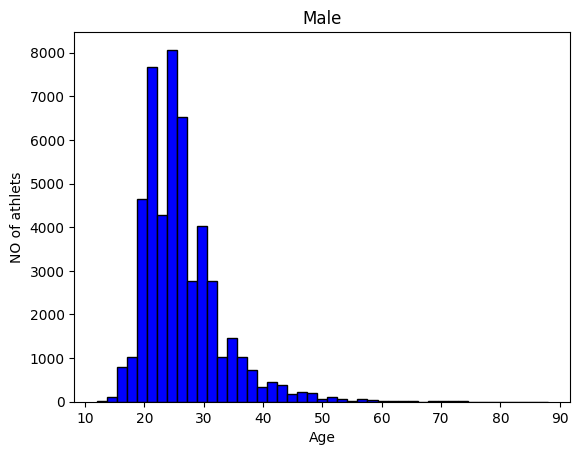

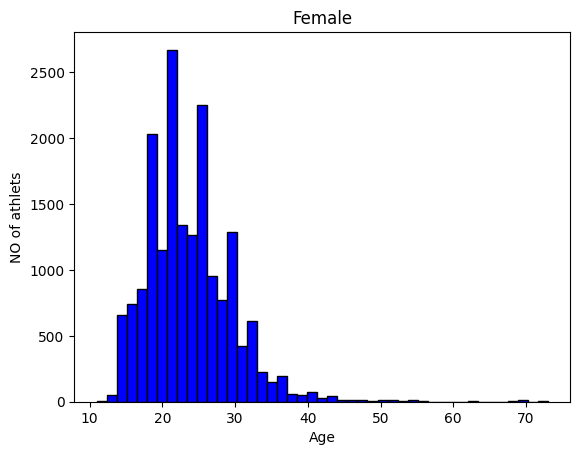

In [7]:
#======================================================
#Your code here
#======================================================
Man=df.loc[df['Sex'] == 'M']
Women=df.loc[df['Sex'] == 'F']

#hist1=Man['Age'].hist()
#hist2=Women['Age'].hist()
plt.figure("Welcome to figure 1")
plt.hist(Man['Age'], color='blue', edgecolor='black', bins=int(45/1))

plt.xlabel('Age')
plt.ylabel('NO of athlets')
plt.title('Male')

plt.figure("Welcome to figure 2")
plt.hist(Women['Age'], color='blue', edgecolor='black', bins=int(45/1))
plt.xlabel('Age')
plt.ylabel('NO of athlets')
plt.title('Female')

#### Are women athletes more aged than men on average? Which age group appears most in the Olympics?

In [8]:
#======================================================
#Your code here
#======================================================

if Women['Age'].mean()>Man['Age'].mean():
  print("woman Are more aged than Men in Olympic"+"\t women average: "+str(Women['Age'].mean())+"\t men average: "+str(Man['Age'].mean()))
else:
    print("men Are more aged than women in Olympic"+"\t women average: "+str(Women['Age'].mean())+"\t men average: "+str(Man['Age'].mean()))

if len(Women)>len(Man):
  print("woman appears more than Men in Olympic")
else:
    print("men appears more than women in Olympic")

men Are more aged than women in Olympic	 women average: 23.776674800354925	 men average: 26.32876350637745
men appears more than women in Olympic


**Your answer :**

men are more aged and more appears in Olimpyc

# Winner winner chicken dinner!

### What are the top 10 countries with more athlete appearance in the Olympics across all time? Create a Pie chart.

['United States', 'France', 'Italy', 'Great Britain', 'Canada', 'Australia', 'Sweden', 'Germany', 'Spain', 'Brazil']


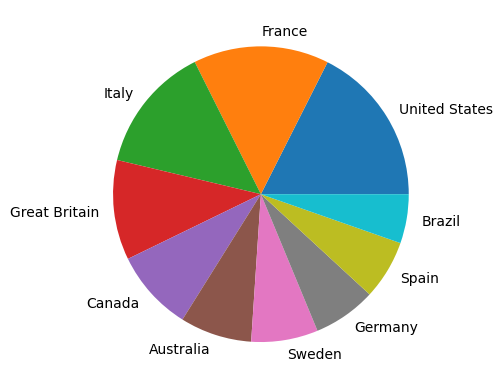

In [9]:
#======================================================
#Your code here
#======================================================
n = 10
list_countery=df['Team'].value_counts()[:n].index.tolist()
sums=[]
print(list_countery)
for i in list_countery:
  sumi=sum(df['Team']== i)
  sums.append(sumi)

plt.pie(sums, labels = list_countery)
plt.show()


###  Now we want to consider amother feature simultaenously. What are the top 10 medal-winning countries across all time? (You can apply coefficients to distinguish gold, silver and bronze medals)

<ipython-input-10-293372a62b1e>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newdf=df3.groupby(['Team']).sum().sort_values('Medal' ,ascending=False).head(10)


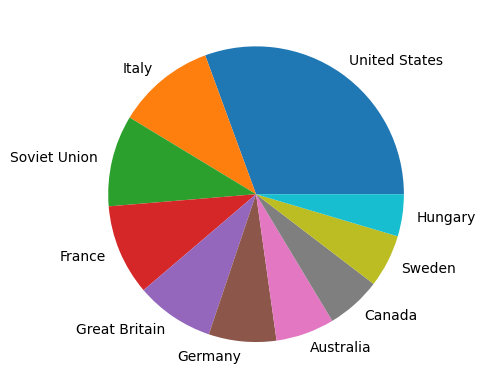

In [10]:
#======================================================
#Your code here
#======================================================
#df.groupby(['Medal'])
#df
df3 = df.copy()
df3=df3[df3['Medal']!='none']
df3= df3.replace(['Gold'], 3)
df3= df3.replace(['Bronze'], 1)
df3= df3.replace(['Silver'], 2)
newdf=df3.groupby(['Team']).sum().sort_values('Medal' ,ascending=False).head(10)
plt.pie(newdf['Medal'], labels = newdf.index.tolist())
plt.show()

### (Optional) Create a video with each frame consisting of a bar chart with the horizontal axis representing the top 10 countries and the vertical axis their count of their won medals. The countries must be sorted in a descending order!

In [11]:
#======================================================
#Your code here
#======================================================
Years=list(set(df3['Year']))

#for i in Years:
 # newdf=df3[df3['Year']==i]
 # new_df=newdf.groupby(['Team']).sum().sort_values('Medal' ,ascending=False).head(10)
  #print(len(new_df))
  #plt.bar(new_df.index.tolist(), newdf['Medal'], color ='maroon', width = 0.4)

  #plt.xlabel("countery")
  #plt.ylabel("No. of Medal")
 # plt.title("barchart")
  #ani = FuncAnimation(fig, animate, interval=100)

newdf=df3.groupby(['Team','Year']).sum()
newdf=newdf[['Medal']]
newdf1=newdf.reset_index()

#newdf1=newdf[['Year','Team','Medal']]
#newdf1.head()
newdf1 = newdf.pivot_table(values = 'Medal',index = ['Year'],columns = 'Team')
newdf1.fillna(0, inplace=True)
newdf1.sort_values(list(newdf1.columns),inplace=True)
newdf1 = newdf1.sort_index()

top_prem_clubs = set()
for index, row in newdf1.iterrows():
    top_prem_clubs |= set(row[row > 0].sort_values(ascending=False).head(10).index)
newdf1 = newdf1[top_prem_clubs]

bcr.bar_chart_race(df = newdf1,
                   n_bars = 10,
                   sort='desc',
                   title='Top 10 country in Olimpyc',
                   filename = 'pl_country.mp4')

#you can download the video

<ipython-input-11-ce9118555cc1>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newdf=df3.groupby(['Team','Year']).sum()
<ipython-input-11-ce9118555cc1>:31: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  newdf1 = newdf1[top_prem_clubs]
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.

# Feature vs. Feature!

### Once more the histograms! Create a histrogram chart representing the age disributions but this time for medal-winning athletes only.

Text(0.5, 1.0, 'Bronze Medal')

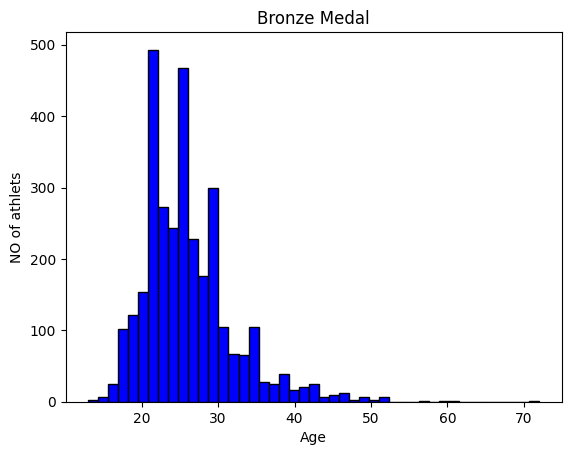

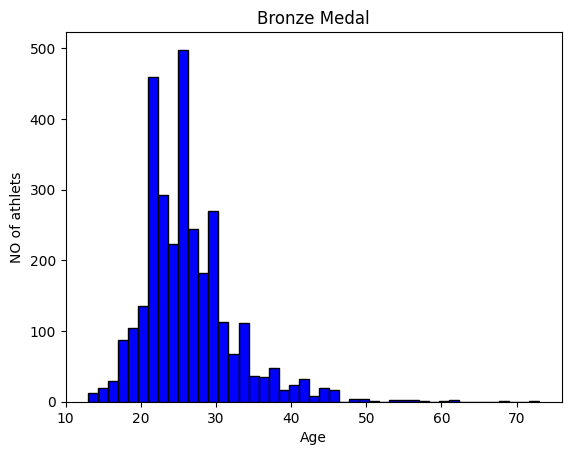

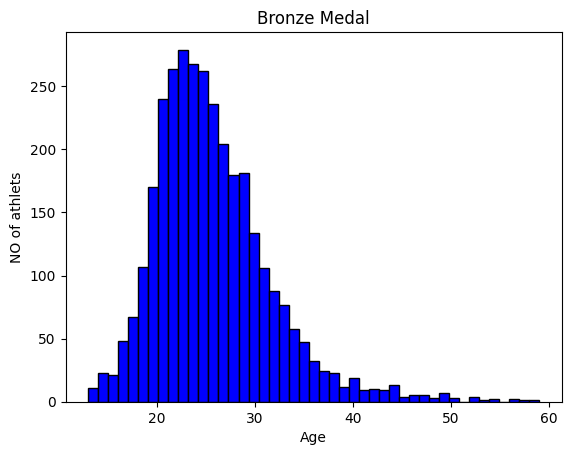

In [12]:
#======================================================
#Your code here
#======================================================

bronze=df.loc[df['Medal'] == 'Bronze']
silver=df.loc[df['Medal'] == 'Silver']
gold=df.loc[df['Medal'] == 'Gold']

#hist1=Man['Age'].hist()
#hist2=Women['Age'].hist()
plt.figure("Welcome to figure 1")
plt.hist(bronze['Age'], color='blue', edgecolor='black', bins=int(45/1))
plt.xlabel('Age')
plt.ylabel('NO of athlets')
plt.title('Bronze Medal')



plt.figure("Welcome to figure 2")
plt.hist(silver['Age'], color='blue', edgecolor='black', bins=int(45/1))
plt.xlabel('Age')
plt.ylabel('NO of athlets')
plt.title('Bronze Medal')

plt.figure("Welcome to figure 3")
plt.hist(gold['Age'], color='blue', edgecolor='black', bins=int(45/1))
plt.xlabel('Age')
plt.ylabel('NO of athlets')
plt.title('Bronze Medal')

### Is there any correlation between winning a medal and the age? You need to prepare the data furthermore! For example, take 1 for athletes with a medal and 0 for those without any. Calculate the correleation between these two features!

In [13]:
#======================================================
#Your code here
#======================================================
df3= df.copy()

df3= df3.replace(['Gold','Silver','Bronze'], 1)
df3= df3.replace(['none'], 0)
ages=df3['Age']
medals=df3['Medal']
my_rho = np.corrcoef(ages,medals)
print(my_rho)

[[1.         0.02566923]
 [0.02566923 1.        ]]


**Your answer :**

because of low correlation between them so they are not much related.

### (Optional) If your familiar with the concepts of linear algebra, carry out a principal component analysis (PCA) to determine the features with more effect in winning a medal. These features include the sex, age, height and weight. (Keep in mind that some weight and height records are NaN!)

             PC0       PC1       PC2       PC3       PC4
Sex     0.491240 -0.208271 -0.073322 -0.842104 -0.028107
Age     0.224136  0.010169  0.970643  0.046168 -0.073347
Height  0.585410  0.027581 -0.205320  0.375518 -0.688015
Weight  0.599700  0.012556 -0.099857  0.331344  0.721417
Medal   0.078109  0.977549 -0.018643 -0.194746  0.004920


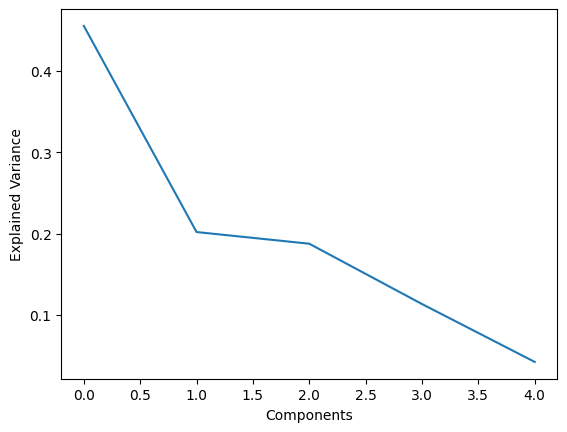

In [14]:
#======================================================
#Your code here
#======================================================
new_df=df3[['Sex','Age',	'Height',	'Weight',	'Medal']]
new_df=new_df.replace(['M'],1)
new_df=new_df.replace(['F'],0)
new_df =new_df.dropna()
df_normalized=(new_df - new_df.mean()) / new_df.std()
pca = PCA(n_components=5)
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=new_df.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

# Finally, the hypotheses!

### In the last part we are going to introduce some hypotheses of our own about the data! Feel free to try out any statistical test that you deem appropriate and analyze our hypothses!

## Hypothesis : Men athletes are more aged than women in general

### suggested method : t-test or Mann-Whitney U test

In [15]:
#======================================================
#Your code here
#======================================================
Man=df.loc[df['Sex'] == 'M']
Women=df.loc[df['Sex'] == 'F']
t_stat, p_value = ttest_ind(Man[['Age']],Women[['Age']])

if p_value < 0.05:
    print("There is a significant difference between the means of Age of Man and Women. and because average age for man is higher than for women so mens are more Aged")
else:
    print("There is no significant difference between the means of Age of Man and Women. so we cannot say man are aged than women")

There is a significant difference between the means of Age of Man and Women. and because average age for man is higher than for women so mens are more Aged


## Hypothesis : African countries win more medals than others

#### Countries are known based on their NOC in olympic. You may find a list of African NOCs in the file "African_NOC.csv".

### Suggested method : Pearson/Spearman correlation analysis

In [44]:
#======================================================
#Your code here
#======================================================
df3 = df.copy()
df3=df3[df3['Medal']!='none']
df3= df3.replace(['Gold'], 3)
df3= df3.replace(['Bronze'], 1)
df3= df3.replace(['Silver'], 2)

dfA= pd.read_csv('./African_NOC.csv', index_col=0)

df_African=df3[df3['NOC'].isin(dfA.index.tolist()) ]
df_NotAfrican=df3[~df3['NOC'].isin(dfA.index.tolist()) ]
newAfrican=df_African.groupby(['Team']).sum().reset_index()
newNotAfrican=df_NotAfrican.groupby(['Team']).sum().reset_index()
newAfrican['is_african']=2*np.ones(len(newAfrican))
newNotAfrican['is_african']=np.ones(len(newNotAfrican))


df_concat = pd.concat([newAfrican, newNotAfrican], axis=0)
df_concat = df_concat[["is_african",'Medal']]

#newdf=df3.groupby(['Team']).sum()
#newdf1=newdf.reset_index()
corr_matrix = df_concat.corr(method='spearman')

print(corr_matrix)


            is_african     Medal
is_african    1.000000  0.035519
Medal         0.035519  1.000000


<ipython-input-44-33a5e9d6128c>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newAfrican=df_African.groupby(['Team']).sum().reset_index()
<ipython-input-44-33a5e9d6128c>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newNotAfrican=df_NotAfrican.groupby(['Team']).sum().reset_index()


correlation between african and medal is near zero so HP is not true

## Hypothesis : The average age of Olympic atheles has decreased over the decades

### Suggested method : ANOVA

In [67]:
#======================================================
#Your code here
#======================================================
years=list(set(df['Year']))
print(min(years))
print(max(years))
list_of_lists=[]

for i in [1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]:

  this_year=df[df['Year']==i]
  for j in [i,i+1,i+2,i+3,i+4,i+5,i+6,i+7,i+8,i+9]:
    this_year = pd.concat([this_year, df[df['Year']==j]], axis=0)
  this_year.describe()
  list_of_lists.append(list(this_year['Age']))
f_oneway(list_of_lists[0],list_of_lists[1],list_of_lists[2],list_of_lists[3],list_of_lists[4],list_of_lists[5],list_of_lists[6],list_of_lists[7],list_of_lists[8],list_of_lists[9],list_of_lists[10],list_of_lists[11],list_of_lists[12])

1896
2016


F_onewayResult(statistic=397.7965821123078, pvalue=0.0)

as you can see p value is 0 so the means are equal and HP is wrong.

# Hope you enjoy
# AIvengers team